In [10]:
# prompt: generate code to read /content/Life Expectancy Data.csv

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
try:
  df = pd.read_csv('/content/Life Expectancy Data.csv')
except FileNotFoundError:
  print("Error: File not found at /content/Life Expectancy Data.csv. Please ensure the file exists in the specified location.")
  exit() # or handle the error in another way

# Display some information about the data (optional)
print(df.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [12]:

print(df.isna().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [13]:

df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [16]:
# prompt: generate code to remove the null values with median values



print(df.isna().sum())

df.describe()

df.columns = df.columns.str.strip()
print(df.columns)

# Fill null values with the median for numerical columns
for col in df.select_dtypes(include=['number']):
    df[col] = df[col].fillna(df[col].median())

print(df.isna().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64
Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI'

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

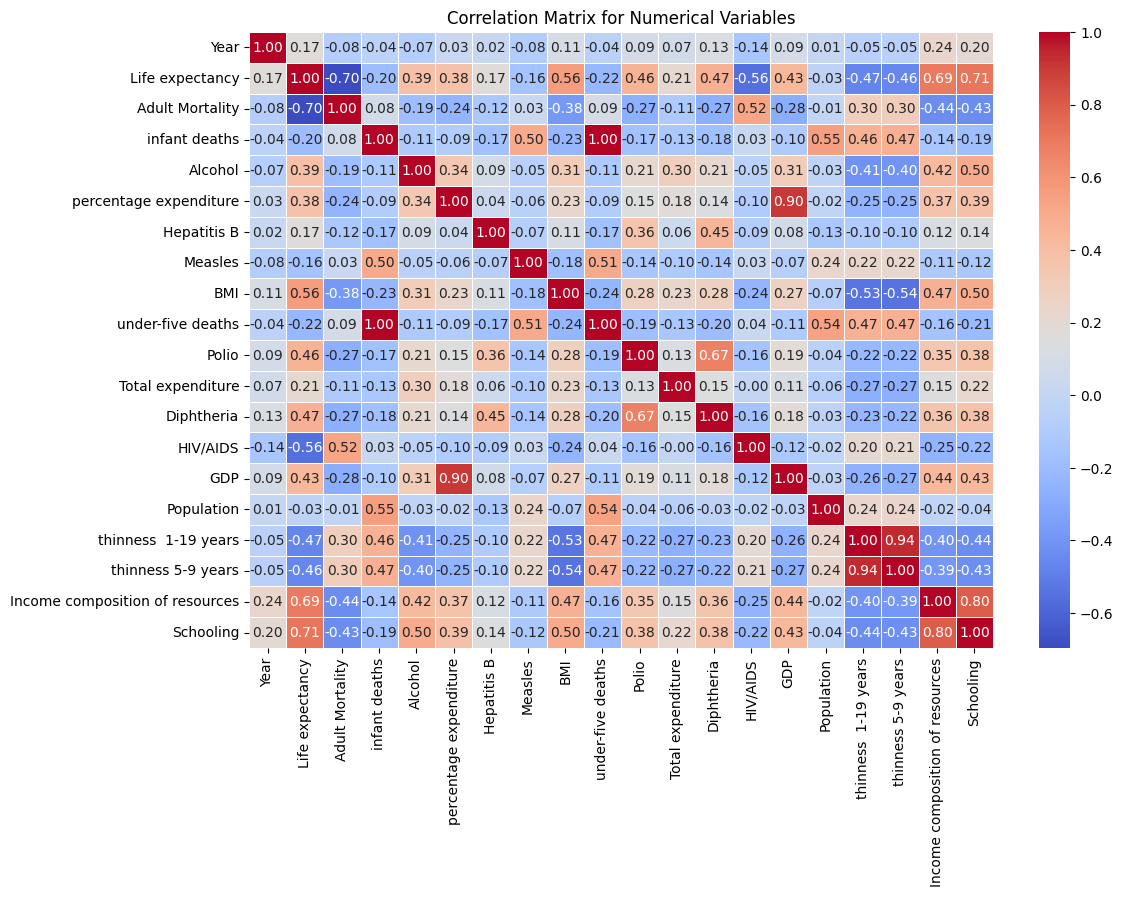

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt # Import the matplotlib library and alias it as plt

# ... (rest of your code) ...

numeric_data = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8)) # Now plt is defined and can be used
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

Mean Squared Error: 39.76963776002885
R-squared: 0.5411232634096206


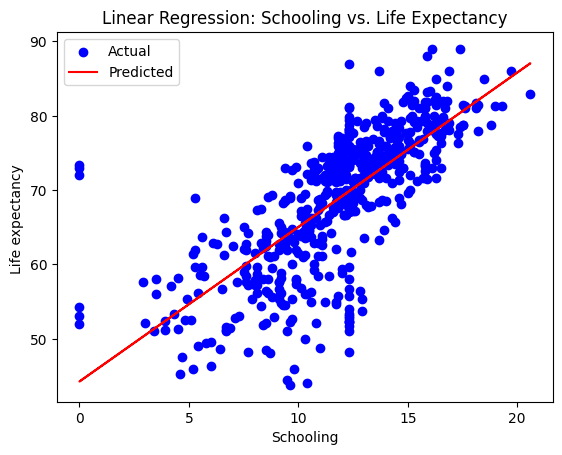

In [24]:
# prompt: i need linear regression with Schooling as independent variable and Life expectancy as dependent variable

# Assuming 'Schooling' and 'Life expectancy ' are in your DataFrame

# Prepare the data
X = df[['Schooling']]  # Independent variable
y = df['Life expectancy']  # Dependent variable  # Remove extra space from column name
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the regression line (optional)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Schooling')
plt.ylabel('Life expectancy ')
plt.title('Linear Regression: Schooling vs. Life Expectancy')
plt.legend()
plt.show()

In [26]:
# prompt: I need multiple linear regression with life expectancy as dependent variable

# Use all relevant features for multiple linear regression
features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']

# Strip extra spaces from feature names to match column names in df
features = [feature.strip() for feature in features]

X = df[features]
y = df['Life expectancy']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print model coefficients (optional)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 15.417159484436095
R-squared: 0.8221111322562291
Coefficients: [-2.12549734e-02  9.67419739e-02  1.17495823e-01  8.54788966e-05
 -1.87169035e-02 -2.40113458e-05  3.99798340e-02 -7.18204635e-02
  2.80678517e-02  6.24074441e-02  4.09823015e-02 -4.61838674e-01
  4.39600663e-05 -1.29997510e-09 -9.96780113e-02  9.10154837e-03
  6.42079880e+00  6.52527306e-01]
Intercept: 55.36230026320888


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming X is your dataset with independent variables after scaling
# Add column names to match your data
X_columns = X.columns

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

                            Feature         VIF
0                   Adult Mortality    3.862207
1                     infant deaths  183.687660
2                           Alcohol    3.684671
3            percentage expenditure    6.528776
4                       Hepatitis B   16.704899
5                           Measles    1.429973
6                               BMI    7.753993
7                 under-five deaths  182.926559
8                             Polio   25.489000
9                 Total expenditure    7.689608
10                       Diphtheria   28.160196
11                         HIV/AIDS    1.580251
12                              GDP    7.418024
13                       Population    1.543369
14             thinness  1-19 years   19.104703
15               thinness 5-9 years   19.123621
16  Income composition of resources   30.570967
17                        Schooling   43.694795


In [29]:
# prompt: generate code to address multicollinearity in multiple linear regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ... (Your existing code) ...

# Assuming X is your dataset with independent variables after scaling
# Add column names to match your data
X_columns = X.columns

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X_columns))]

# Display the VIF values
print(vif_data)

# Identify features with high VIF (e.g., > 5 or 10)
high_vif_features = vif_data[vif_data["VIF"] > 5]["Feature"].tolist()
print("\nFeatures with high VIF:", high_vif_features)

# Remove features with high VIF iteratively or based on domain knowledge
# Example: Remove features one by one, checking VIF after each removal

X_new = X.drop(columns=high_vif_features) #Initial removal of high VIF features
#Check VIF again after removing the features
vif_data = pd.DataFrame()
vif_data["Feature"] = X_new.columns
vif_data["VIF"] = [variance_inflation_factor(X_new.values, i) for i in range(len(X_new.columns))]
print(vif_data)
print("\nFeatures with high VIF after removing some features",vif_data[vif_data["VIF"] > 5]["Feature"].tolist())


# Split data with new features after removing highly correlated ones
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train the model with the new features
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error after removing multicollinearity: {mse}")
print(f"R-squared after removing multicollinearity: {r2}")

                            Feature         VIF
0                   Adult Mortality    3.862207
1                     infant deaths  183.687660
2                           Alcohol    3.684671
3            percentage expenditure    6.528776
4                       Hepatitis B   16.704899
5                           Measles    1.429973
6                               BMI    7.753993
7                 under-five deaths  182.926559
8                             Polio   25.489000
9                 Total expenditure    7.689608
10                       Diphtheria   28.160196
11                         HIV/AIDS    1.580251
12                              GDP    7.418024
13                       Population    1.543369
14             thinness  1-19 years   19.104703
15               thinness 5-9 years   19.123621
16  Income composition of resources   30.570967
17                        Schooling   43.694795

Features with high VIF: ['infant deaths', 'percentage expenditure', 'Hepatitis B', 'BMI

Significant Reduction in VIF: The VIF for all remaining features is now below 5, indicating successful removal of multicollinearity, which improves the model’s reliability.

Fewer Features Retained: After removing multicollinear features, only five variables remain (Adult Mortality, Alcohol, Measles, HIV/AIDS, Population). These are now the most independent predictors.

Mean Squared Error (MSE): The MSE is 35.08, which reflects the average squared difference between actual and predicted values. While this is acceptable, it could be higher due to the removal of key predictors.